#**Exploratory Data Analysis and Baseline Regression**

---

**Objectives:**

* Perform exploratory data analysis (EDA) to understand feature distributions, identify key patterns, and explore relationships with the target variable (`SalePrice`).

* Examine correlations and potential multicollinearity among numerical features to guide feature selection for regression models.

* Encode categorical variables and prepare the dataset for modeling.

* Train and evaluate a **baseline Linear Regression model** to establish initial performance metrics for comparison with future models.

**Dataset:**

The data used here is the cleaned version of the **Ames Housing Dataset** training dataset which I processed in the previous notebook [01_Project_Initiation_DataCleaning.ipynb](https://github.com/MJBantayan/Machine-Learning-Portfolio/blob/main/01_RegressionModels_HousingPrices/01_Project_Initiation_DataCleaning.ipynb).


###**1. Import Libraries and Load Data:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Load the dataset:

In [ ]:
from google.colab import files
uploaded = files.upload()

df_train = pd.read_csv('housing_train_cleaned.csv', keep_default_na = False)

Saving housing_train_cleaned.csv to housing_train_cleaned.csv


In [ ]:
pd.set_option('display.max_columns', None)
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,0,12,2008,WD,Normal,250000


###**2. Exploratory Data Analysis**

---

What I wanna do here is group the data into **numerical** (`int64` and `float`) and **categorical** (`object`). Furthermore, I wanna subdivide categorical data into **nominal** or *unordered data* which I can one-hot encode and **ordinal** or *ordered data* which i can map to 1-n scales (like 1-4, 1-5 or 1-7 scales).

In [ ]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

Divide data into numerical and categorical colums:

In [ ]:
date_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']
df_train[date_cols].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,2003,2003,2003.0,2,2008
1,1976,1976,1976.0,5,2007
2,2001,2002,2001.0,9,2008
3,1915,1970,1998.0,2,2006
4,2000,2000,2000.0,12,2008


In [ ]:
num_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
num_cols = [col for col in num_cols if col not in date_cols]

cat_cols = df_train.select_dtypes(include=['object']).columns
cat_cols = [col for col in cat_cols if col not in date_cols]

print("Numerical features:", len(num_cols))
print("Categorical features:", len(cat_cols))

Numerical features: 32
Categorical features: 40


In [ ]:
df_train[num_cols].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500
1,20,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,181500
2,60,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,223500
3,70,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,140000
4,60,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,250000


In [ ]:
df_train[cat_cols].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,NA,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NA,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NA,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,WD,Normal


Classify *nominal*, *ordinal*, and *binary* data:

In [ ]:
cat_cols = df_train.select_dtypes(include=['object']).columns.tolist()
cat_cols = [col for col in cat_cols if col not in date_cols]

binary_cols = [col for col in cat_cols if df_train[col].nunique()==2]
print("binary columns: ",binary_cols)
print(f"\nTotal binary columns: {len(binary_cols)}")


binary columns:  ['Street', 'Utilities', 'CentralAir']

Total binary columns: 3


In [ ]:
ordinal_cols = [col for col in cat_cols if any(x in col.lower() for x in ['qu', 'qc', 'cond'])]
ordinal_cols = [col for col in ordinal_cols if col not in ['Condition1', 'Condition2']]

ordinal_cols.append('Functional')

print("Ordinal columns:")
print(ordinal_cols)
print(f"\nTotal ordinal columns: {len(ordinal_cols)}")


Ordinal columns:
['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'SaleCondition', 'Functional']

Total ordinal columns: 12


In [ ]:
nominal_cols = [col for col in cat_cols if col not in ordinal_cols and col not in binary_cols and col not in date_cols]

print("Nominal columns:")
print(nominal_cols)
print(f"\nTotal nominal columns: {len(nominal_cols)}")

Nominal columns:
['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Electrical', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType']

Total nominal columns: 25


Check if the number of nominal, ordinal and binary columns equals the number of categorical columns:

In [ ]:
len(set(nominal_cols + ordinal_cols + binary_cols)) == len(cat_cols)

True

In [ ]:
df_train[nominal_cols].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,Electrical,GarageType,GarageFinish,PavedDrive,SaleType
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,No,GLQ,Unf,GasA,SBrkr,Attchd,RFn,Y,WD
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,Gd,ALQ,Unf,GasA,SBrkr,Attchd,RFn,Y,WD
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,Mn,GLQ,Unf,GasA,SBrkr,Attchd,RFn,Y,WD
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,No,ALQ,Unf,GasA,SBrkr,Detchd,Unf,Y,WD
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,Av,GLQ,Unf,GasA,SBrkr,Attchd,RFn,Y,WD


In [ ]:
df_train[ordinal_cols].head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC,SaleCondition,Functional
0,Gd,TA,Gd,TA,Ex,Gd,NA,TA,TA,NA,Normal,Typ
1,TA,TA,Gd,TA,Ex,TA,TA,TA,TA,NA,Normal,Typ
2,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA,NA,Normal,Typ
3,TA,TA,TA,Gd,Gd,Gd,Gd,TA,TA,NA,Abnorml,Typ
4,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA,NA,Normal,Typ


In [ ]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

Let's check the average price of houses per neighborhood:

In [ ]:
neighbor_price = df_train.groupby('Neighborhood')['SalePrice'].mean()
neighbor_price.sort_values(ascending=False)

,SalePrice
Neighborhood,
NoRidge,335295.317073
NridgHt,316270.623377
StoneBr,310499.000000
Timber,242247.447368
Veenker,238772.727273
Somerst,225379.837209
ClearCr,212565.428571
Crawfor,210624.725490
CollgCr,197965.773333


Let's check the distribution of data per nominal column:

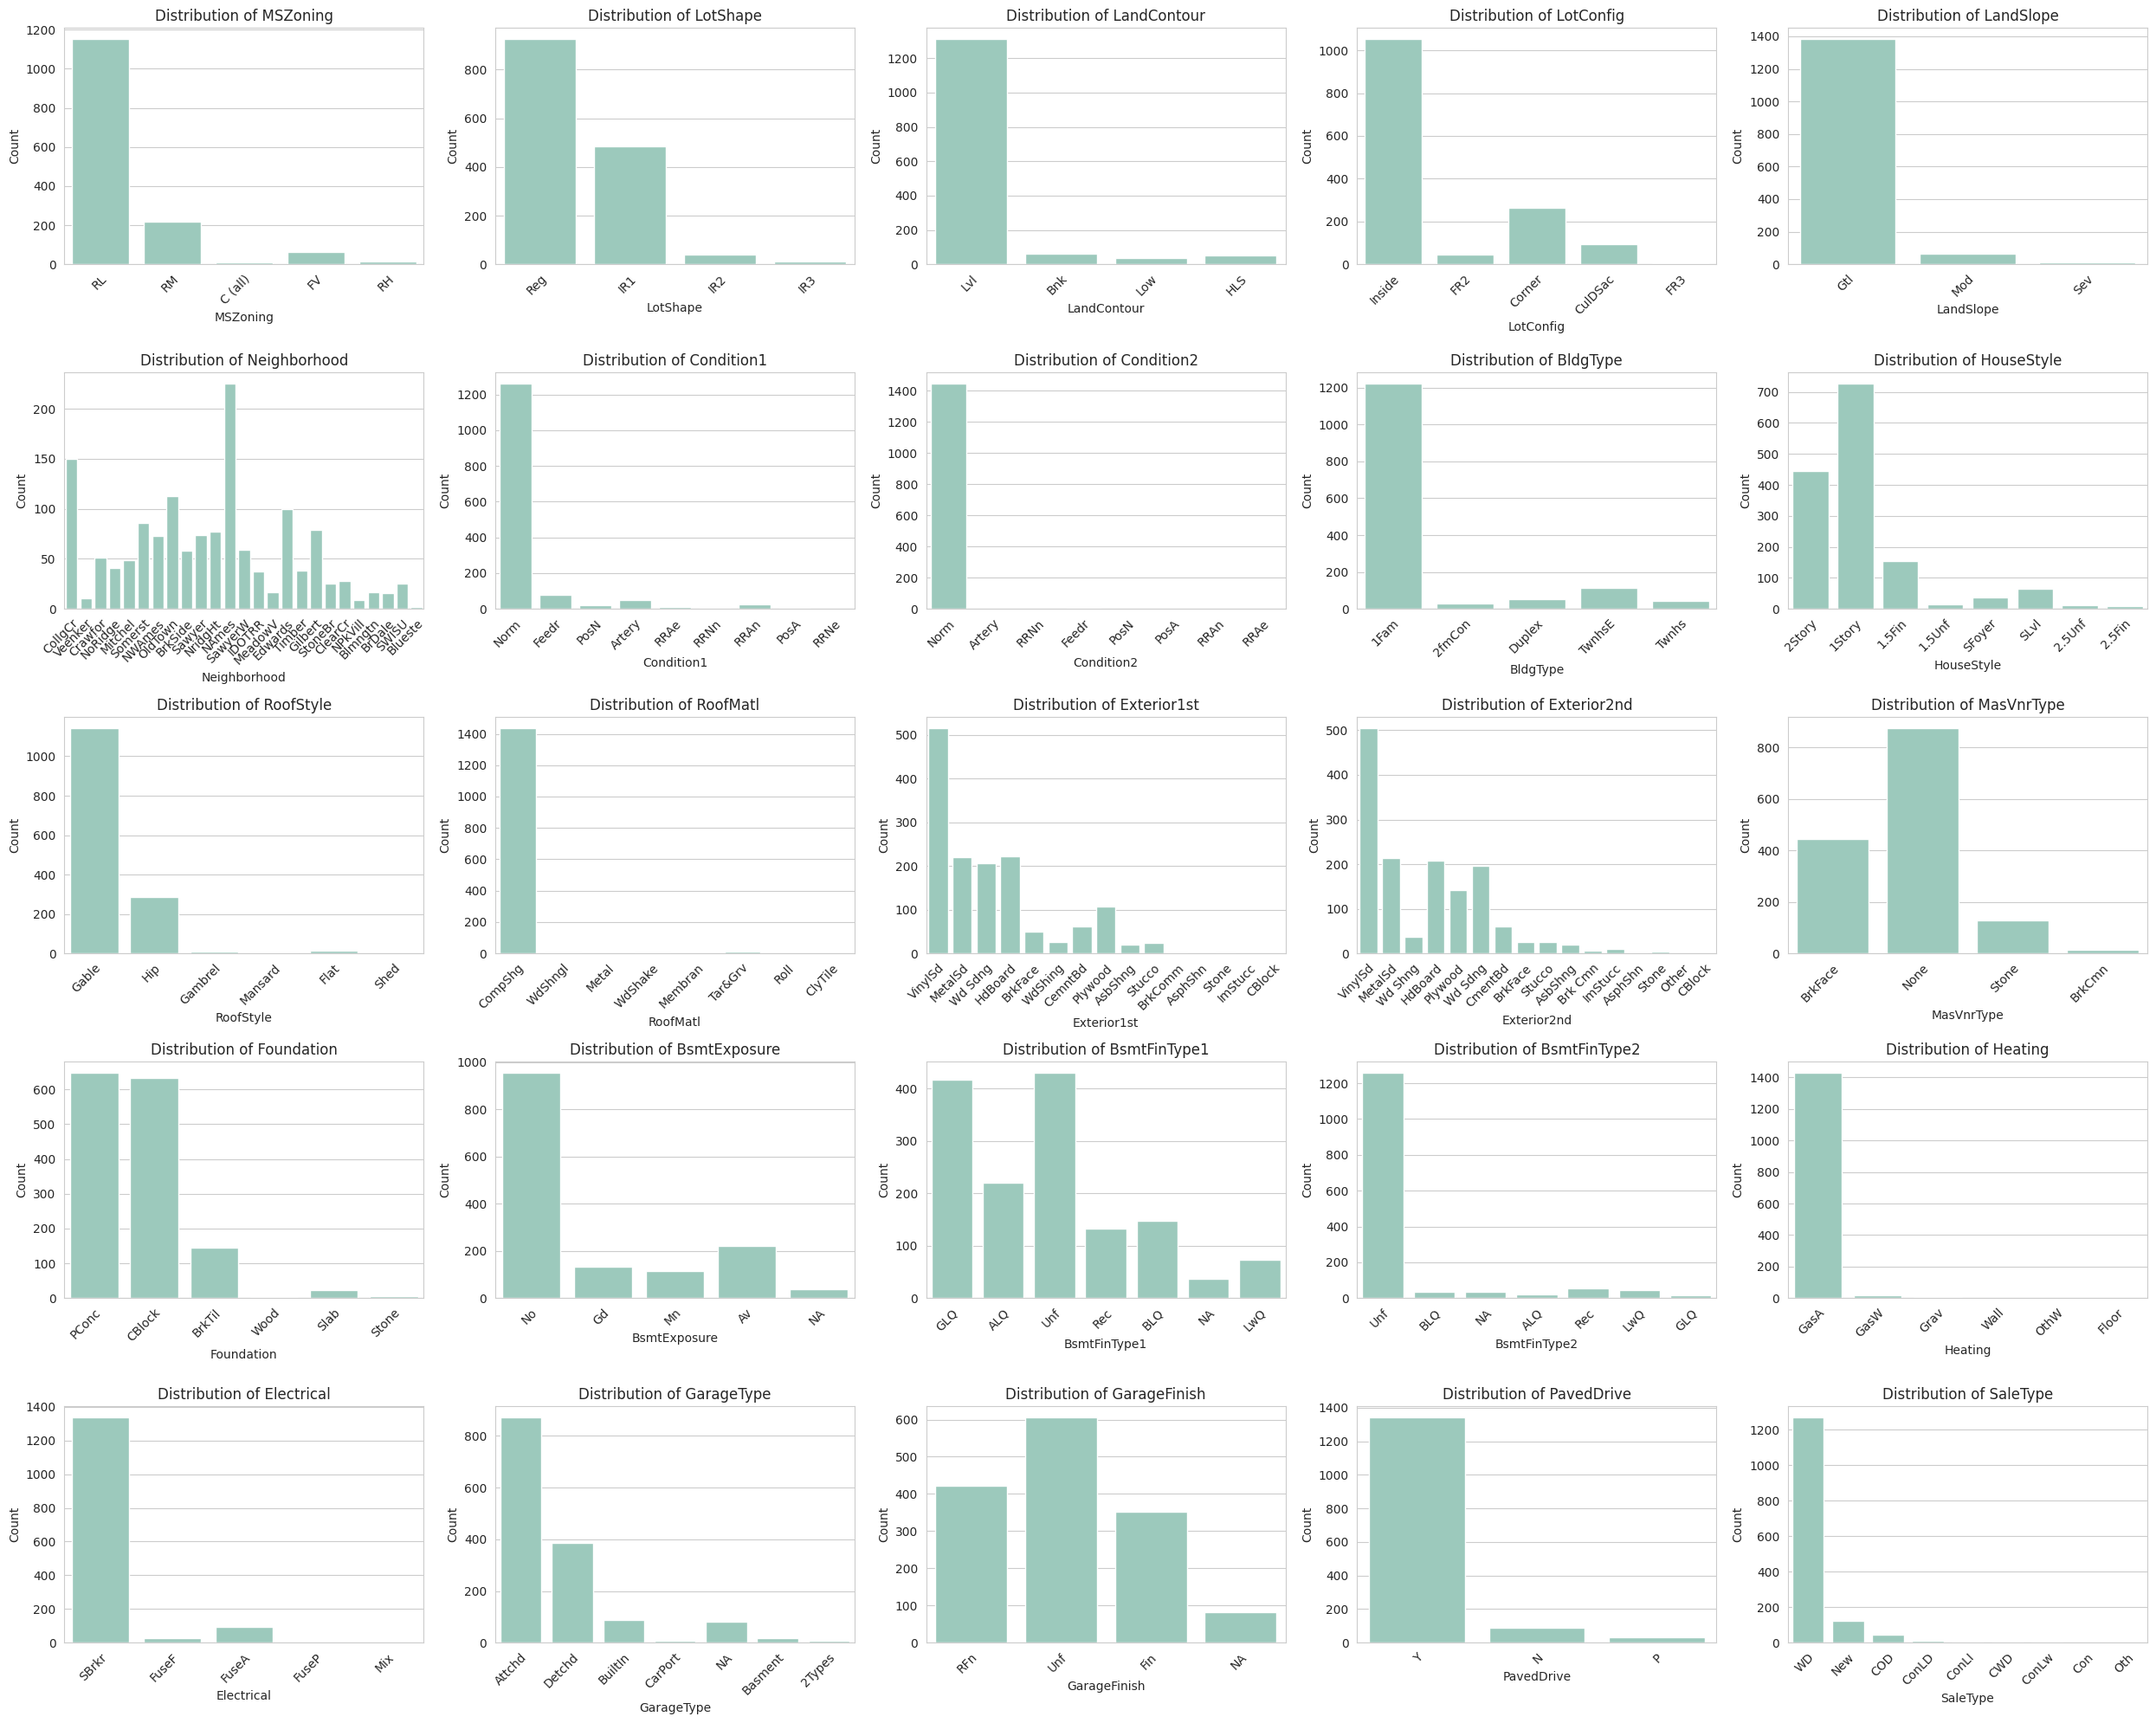

In [ ]:
cols_to_plot = nominal_cols
n_cols = 5
n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    sns.countplot(data=df_train, x=col, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    for label in axes[i].get_xticklabels():
      label.set_horizontalalignment('right')
      label.set_rotation_mode('anchor')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

We can see some patterns emerge:

* the distribution favors specific columns which show the majority counts, that means the distribution is skewed one way.

*  It's also interesting to note that the count of houses per neighborhood does not coincide with the mean price per neighborhood. This could mean that owners are holding on to their houses in expensive neighborhoods and middle priced houses are sold right away. Something that we will check later on.

* I might need to transform `BsmtExposure` into a binary of **no basement** or `0` for `NA` and **has basement** or `1` for all other responses, since the data is showing it has significantly more NA.

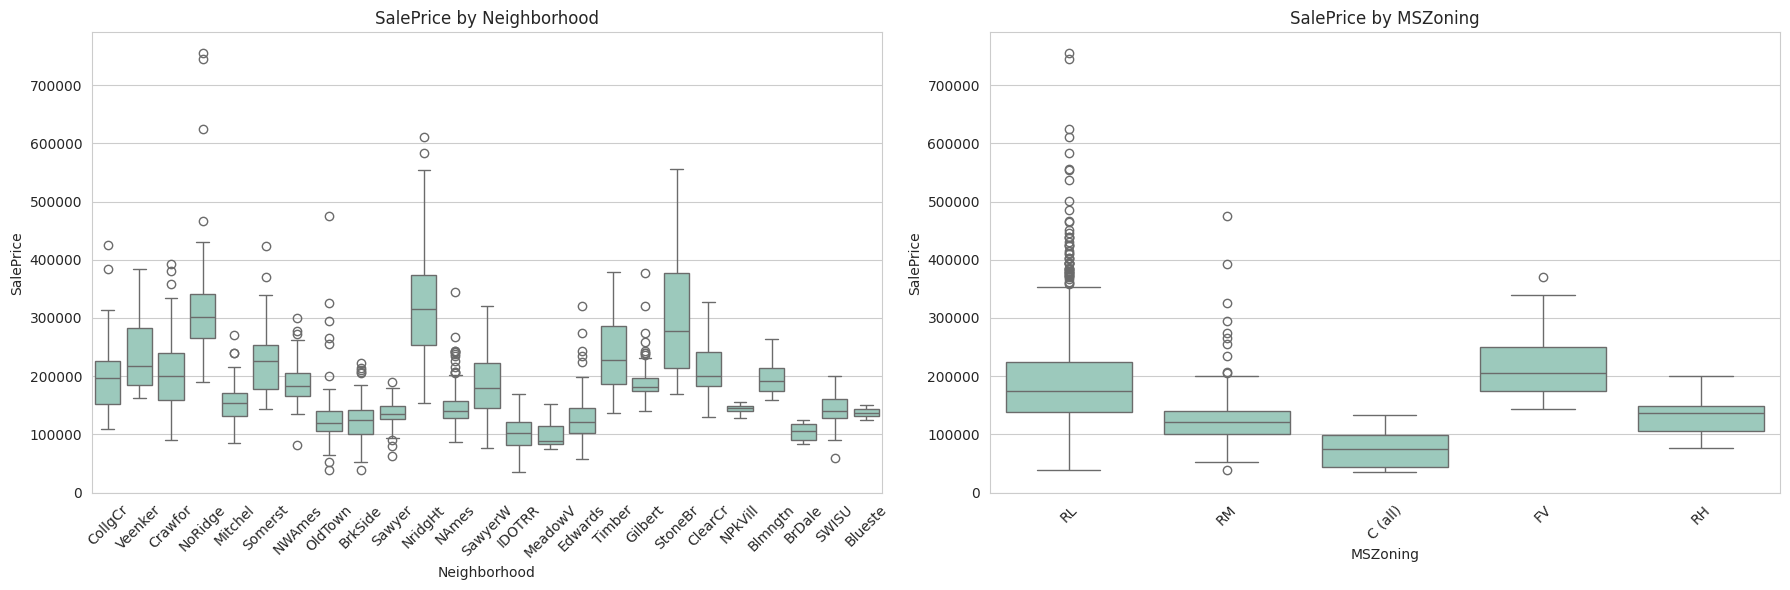

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

#Neighborhood
sns.boxplot(data=df_train, x='Neighborhood', y='SalePrice', ax=axes[0])
axes[0].set_title("SalePrice by Neighborhood")
axes[0].set_xlabel("Neighborhood")
axes[0].set_ylabel("SalePrice")
axes[0].tick_params(axis='x', rotation=45)

#Zoning
sns.boxplot(data=df_train, x='MSZoning', y='SalePrice', ax=axes[1])
axes[1].set_title("SalePrice by MSZoning")
axes[1].set_xlabel("MSZoning")
axes[1].set_ylabel("SalePrice")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


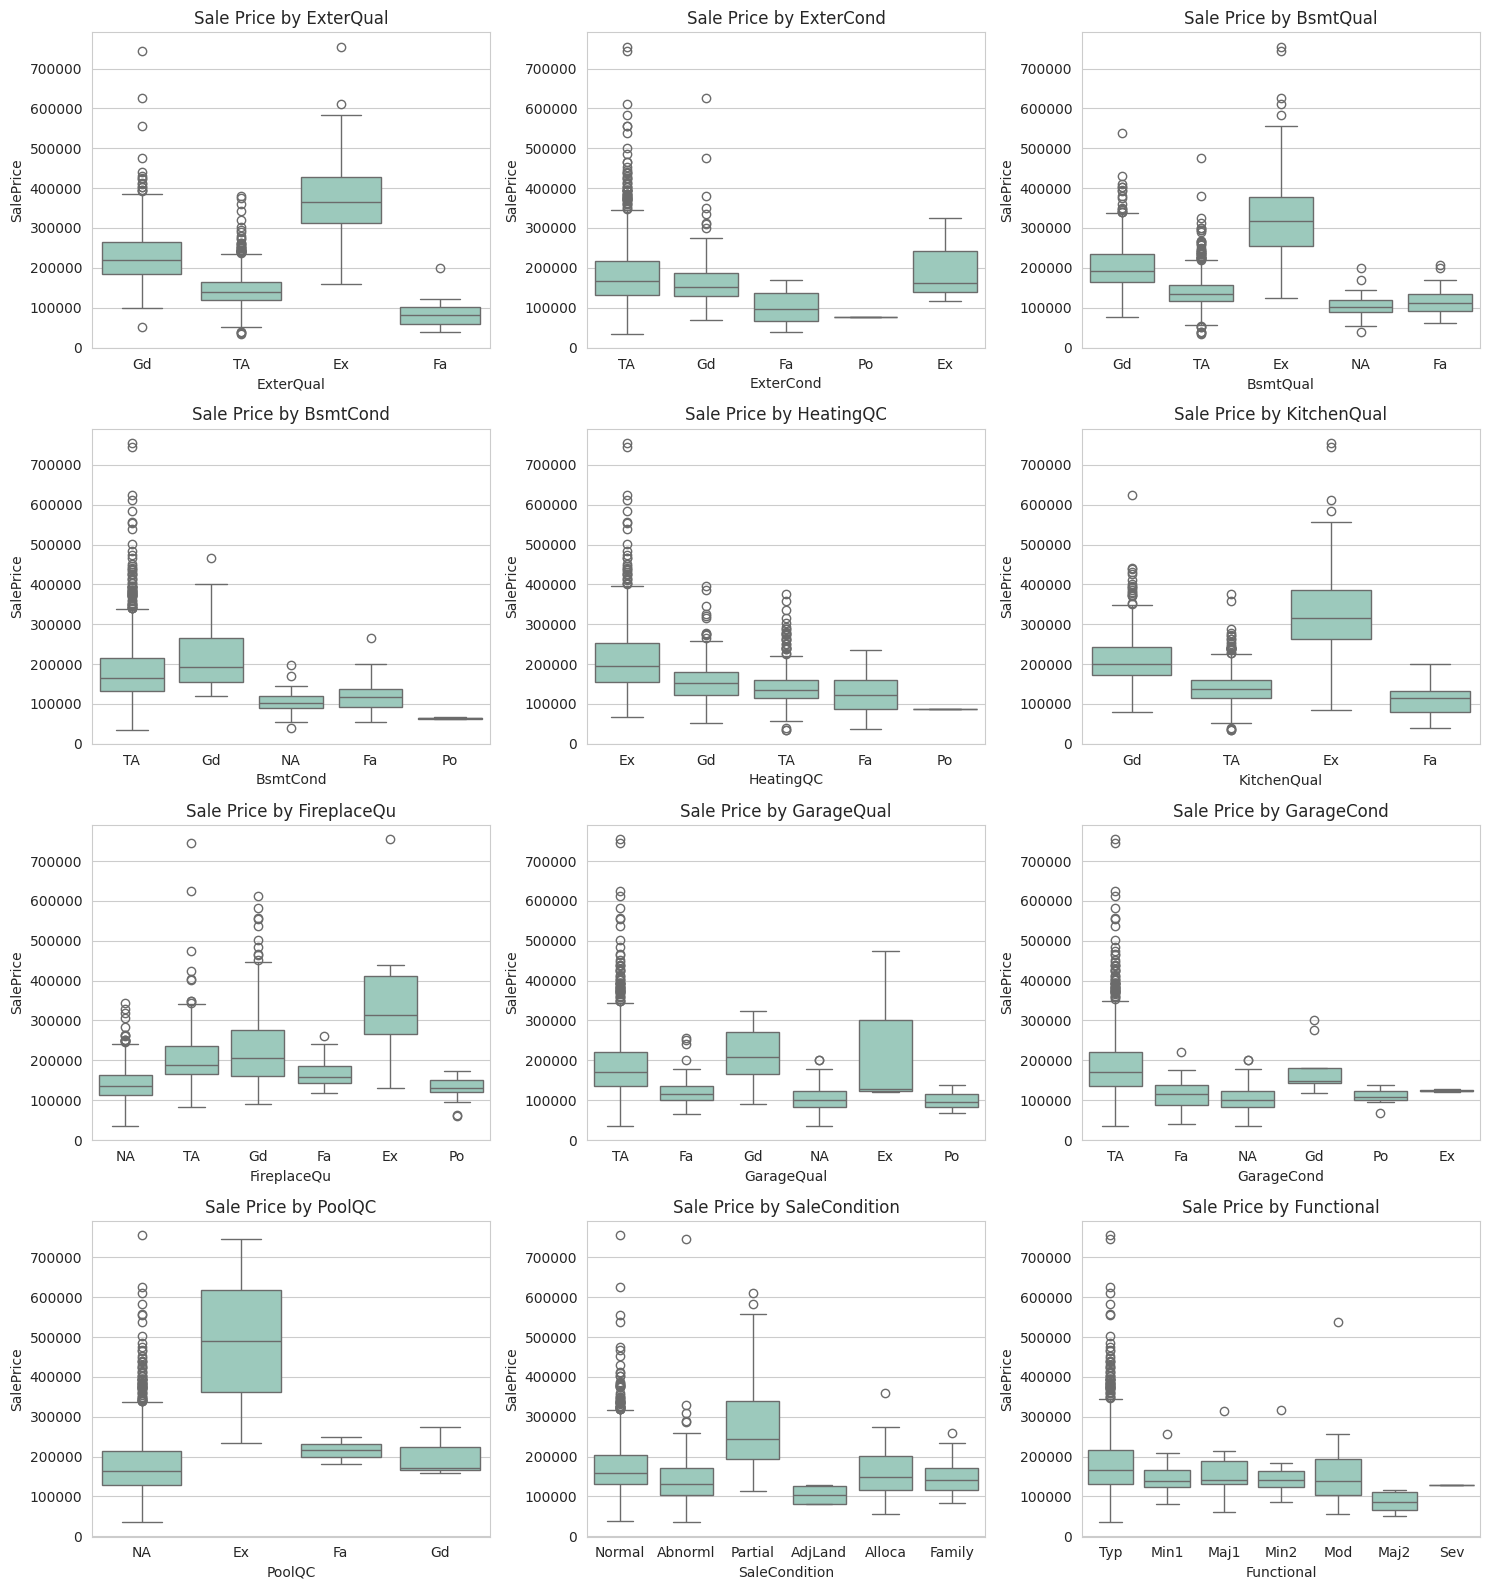

In [ ]:
cols_to_plot = ordinal_cols
n_cols = 3
n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    sns.boxplot(data=df_train, x=col, y='SalePrice', ax=axes[i])
    axes[i].set_title(f'Sale Price by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('SalePrice')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Some observations on sales price versus ordinals:

* There appears to be a direct relationship between **house quality/condition** and **sales price**, where house qualities and conditions (example: Kitchen quality, Fireplace quality, basement quality, pool quality) rated `Excellent` and `Good` fetched higher sales prices.

* Need to crosscheck with neighborhoods to check assumption that high priced neighborhoods hae the same high ratings for house qualities and conditions.


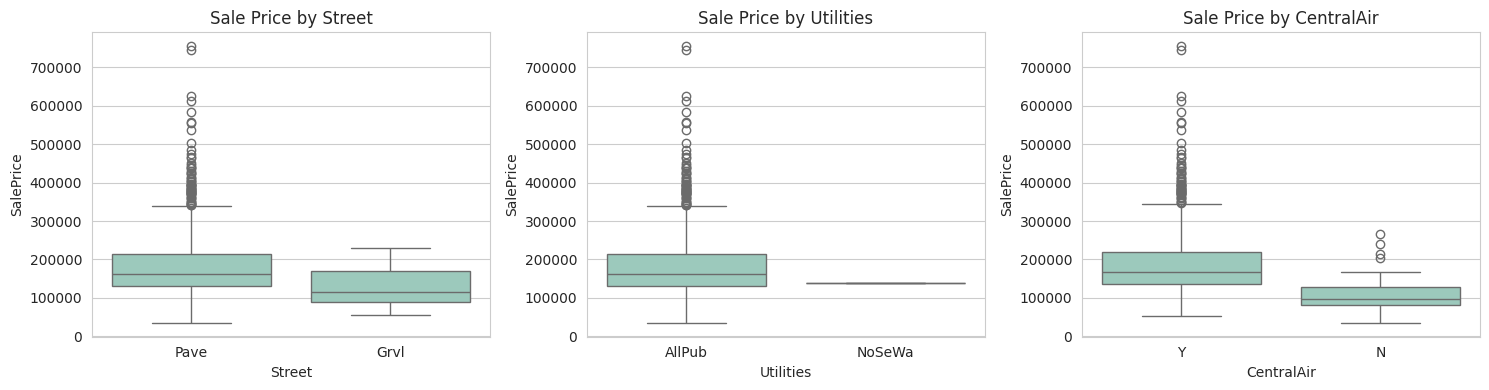

In [ ]:
cols_to_plot = binary_cols
n_cols = 3
n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    sns.boxplot(data=df_train, x=col, y='SalePrice', ax=axes[i])
    axes[i].set_title(f'Sale Price by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('SalePrice')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Observations about binary categories:

* Properties with presence of **utilities**, **centralized air-conditiong** and **paved street** fecthed higher **sales prices**.

* Note that these are forced into binaries because the data classification mainly hinges on **presence of 1 dominant category versus absence of all other categories** in the same class, except for `CentralAir` which is neatly divided into a `Y` or `N` classification. We may add more columns into the binary_cols during feature engineering.

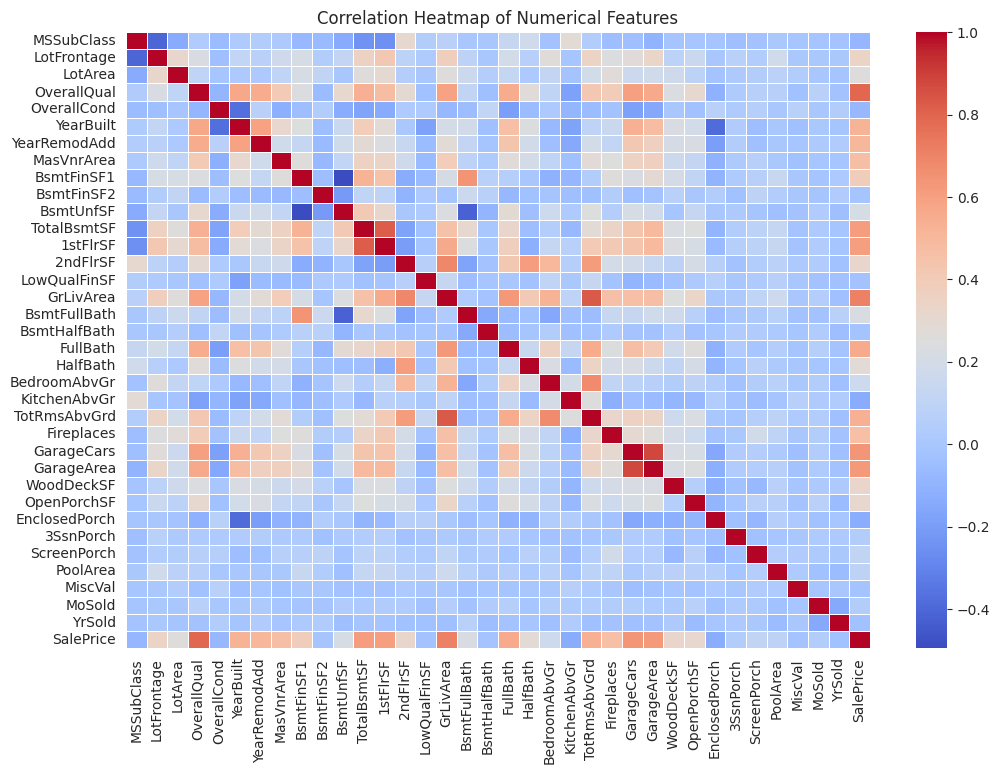

In [ ]:
plt.figure(figsize=(12,8))
corr_matrix = df_train.corr(numeric_only=True)
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [ ]:
corr_with_target = corr_matrix['SalePrice'].sort_values(ascending=False)
corr_with_target.head(11)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


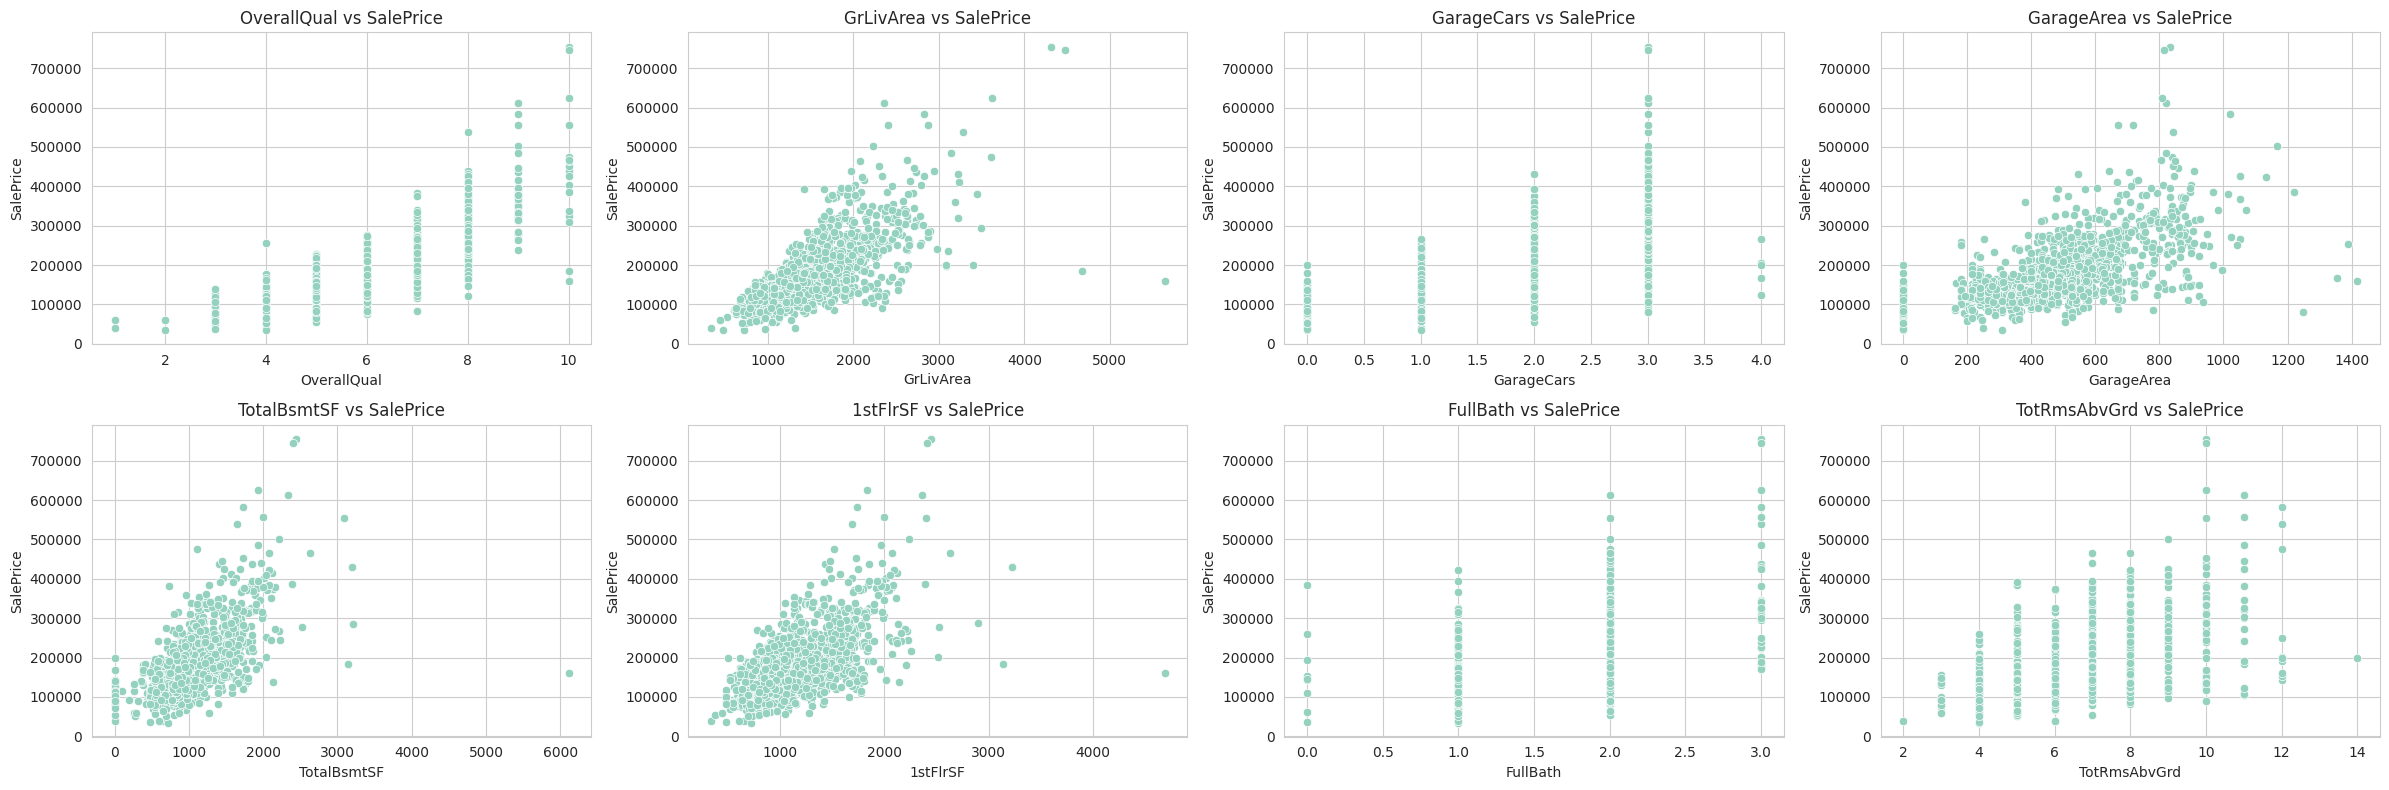

In [ ]:
top_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd']

n_rows = 2
n_cols = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(top_features):
    sns.scatterplot(data=df_train, x=col, y='SalePrice', ax=axes[i])
    axes[i].set_title(f'{col} vs SalePrice')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

###**3. Training Baseline Linear Regression Model**
---

Now that we have succesfully explored the dataset and we have some general idea about its distribution and behavior we can now proceed to training our preliminary *linear regression model*. We will validate its performance so we can establish a baseline which will be the basis of model improvement that we will pursue.

3.1. Import necessary modules from Scikit Learn:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

3.2 Define data for training:

---

Our goal is to divide the data into 80% training set and 20% testing set. Before dividing the data we need to prepocess the columns according to the datatypes, for example our binaries need to be mapped to 0,1 and our ordinals need to be encoded into 1-5 scales and lastly the nominal ones will be one-hot encoded. Then we can split the data!

In [ ]:
# Numeric columns (exclude target and date columns)
num_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols = [col for col in num_cols if col not in ['SalePrice', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']]

# Binary columns
binary_cols = ['CentralAir', 'Street', 'Utilities']

# Map binary features to 0/1
df_train['CentralAir'] = df_train['CentralAir'].map({'Y':1, 'N':0})
df_train['Street'] = df_train['Street'].map({'Pave':1, 'Grvl':0})
df_train['Utilities'] = df_train['Utilities'].map({'AllPub':1, 'NoSeWa':0})

# Optional ordinal features (quick baseline)
ordinal_cols_baseline = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC',
                         'KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df_train[ordinal_cols_baseline] = enc.fit_transform(df_train[ordinal_cols_baseline])

#Nominal features for quick one-hot
nominal_cols_baseline = ['Neighborhood','MSZoning']


Split the data into training and test sets:

In [ ]:
X = df_train[num_cols + binary_cols + ordinal_cols_baseline + nominal_cols_baseline]
y = df_train['SalePrice']

Define preprocessor:

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), nominal_cols_baseline)
    ],
    remainder='passthrough'
)

Create pipeline:

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

Split the data into training data and test data:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train the model on the data:

In [ ]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


In [ ]:
print(y_pred)

[147289.71741049 334009.43012091 107723.19874159 174353.89725044
 295166.73239616  62469.30665656 246128.6678814  144043.56359617
  59644.69554567 144375.37437428 149941.75776316 114700.04716433
  85853.14334503 239741.47078585 169119.58813751 140121.24604804
 202268.98679074 125349.61945516 114032.86936856 224195.8777719
 176545.74920618 211346.21347776 193697.23650101 120364.37592366
 206765.71760053 146217.69640266 186934.99529006  92054.55768913
 163352.95560917 194575.26664964 142213.38121734 293358.7727871
 241707.43848982  95148.20179782 262804.07173289 150093.96707256
 135128.33249603 214510.19317649 330896.63304848  80315.62351394
 130781.97225463 233770.1852969  101433.15595595 334685.99453193
 128797.38246158 154101.24143027  99245.80943841 132185.77052886
 396330.21735611 124413.30349805 118776.61120725 198333.42136759
 105818.52181609 313250.63873041 155273.55625667 236475.62843147
 209970.86065001 177454.24395345 125140.13497144 108925.46357305
  87233.1607195  150172.228

Now let's compare the prediction `y_pred` of our baseline model to the target of the testing data `y_test` by using statistical measures:

In [ ]:
# R^2
print("R^2 score:", r2_score(y_test, y_pred))

# MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)


R^2 score: 0.8590282484924592
MSE: 1081299320.0613616
RMSE: 32883.11603332874
MAE: 19871.62224185588


In [ ]:
df_train['SalePrice'].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


###**4. Conclusion:**

---

Our **baseline linear regression model** is able to interpret **86%** of the training data set. This is a high value of R2-score but below the boundary for overfitting (r² > 0.9).

The **mean absolute error (MAE)** is around *$20,000*

While the **root mean square error (RMSE)** is *$33,000*.

When we compare these prices to the mean sales price of *$180, 921* we can see that the error is between **11%** to **18%**.



---
I'll save my work so I can use the preprocessed data and the regression artefact in the next notebook where I will try to optimize the linear regression model by using polynomial features, and compare its r2 with other regressors in the ensemble!

In [ ]:
df_train.to_csv("housing_train_preprocessed.csv", index=False)
print('Preprocessed dataframe saved!')

Preprocessed dataframe saved!


-end-